<a href="https://colab.research.google.com/github/xinyuzhang99/User-Behavior-Analysis-from-Taobao/blob/main/1_Data_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies and Set Environment

*   Java 8
*   Apache Spark with Hadoop
*   Findspark: locate the spark in the system


In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

In [3]:
!pip install -q findspark

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [5]:
!ls

sample_data  spark-3.4.1-bin-hadoop3  spark-3.4.1-bin-hadoop3.tgz


In [6]:
import findspark
findspark.init()

In [7]:
findspark.find()    # find the location for Spark

'/content/spark-3.4.1-bin-hadoop3'

In [8]:
from pyspark.sql import SparkSession
# create a SparkSession
# SparkSession.builder: start the process of creating a SparkSession
# master("local[*]"): set the Spark master URL to local mode with all available CPU cores on the machine
# getOrCreate(): get an existing SparkSession or create a new one if none exists --> ensure only one SparkSession is created per JVM (Java Virtual Machine)
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## Load Data

In [55]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

In [10]:
# Connect Google Drive files to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = spark.read.csv('/content/drive/MyDrive/Projects/User_Behavior_Analysis_from_Taobao/UserBehavior.csv')

In [12]:
# rename the columns based on dataset description
df = df.withColumnRenamed('_c0', 'User_ID')     \
       .withColumnRenamed('_c1', 'Product_ID')  \
       .withColumnRenamed('_c2', 'Category_ID') \
       .withColumnRenamed('_c3', 'Behavior')    \
       .withColumnRenamed('_c4', 'Timestamp')
df.show(5)

+-------+----------+-----------+--------+----------+
|User_ID|Product_ID|Category_ID|Behavior| Timestamp|
+-------+----------+-----------+--------+----------+
|      1|   2268318|    2520377|      pv|1511544070|
|      1|   2333346|    2520771|      pv|1511561733|
|      1|   2576651|     149192|      pv|1511572885|
|      1|   3830808|    4181361|      pv|1511593493|
|      1|   4365585|    2520377|      pv|1511596146|
+-------+----------+-----------+--------+----------+
only showing top 5 rows



In [13]:
from pyspark.sql.functions import to_date, from_unixtime, date_format, month, dayofmonth, dayofweek, hour

In [23]:
# convert from unix time to date
df = df.withColumn("Datetime", date_format(from_unixtime("Timestamp"), 'yyyy-MM-dd HH:mm:ss'))
df.show(5)

+-------+----------+-----------+--------+----------+----------+-----+---+-----------+----+
|User_ID|Product_ID|Category_ID|Behavior| Timestamp|  Datetime|Month|Day|Day_of_Week|Hour|
+-------+----------+-----------+--------+----------+----------+-----+---+-----------+----+
|      1|   2576651|     149192|      pv|1511572885|2017-11-25|   11| 25|          7|   1|
|      1|   3830808|    4181361|      pv|1511593493|2017-11-25|   11| 25|          7|   7|
|      1|   4365585|    2520377|      pv|1511596146|2017-11-25|   11| 25|          7|   7|
|      1|   4606018|    2735466|      pv|1511616481|2017-11-25|   11| 25|          7|  13|
|      1|    230380|     411153|      pv|1511644942|2017-11-25|   11| 25|          7|  21|
+-------+----------+-----------+--------+----------+----------+-----+---+-----------+----+
only showing top 5 rows



In [15]:
df.drop('Timestamp')

User_ID,Product_ID,Category_ID,Behavior,Datetime
1,2268318,2520377,pv,2017-11-24 17:21:10
1,2333346,2520771,pv,2017-11-24 22:15:33
1,2576651,149192,pv,2017-11-25 01:21:25
1,3830808,4181361,pv,2017-11-25 07:04:53
1,4365585,2520377,pv,2017-11-25 07:49:06
1,4606018,2735466,pv,2017-11-25 13:28:01
1,230380,411153,pv,2017-11-25 21:22:22
1,3827899,2920476,pv,2017-11-26 16:24:33
1,3745169,2891509,pv,2017-11-26 19:44:31
1,1531036,2920476,pv,2017-11-26 22:02:12


In [16]:
df.printSchema()

root
 |-- User_ID: string (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Category_ID: string (nullable = true)
 |-- Behavior: string (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Datetime: string (nullable = true)



### Data Cleaning

In [17]:
# Create a temporary view to run SQL queries on df
df.createOrReplaceTempView('df_temp')

In [18]:
# drop data points outside the range using sql
# This can also be done by:
# df = df.filter(df['Datetime'] > '2017-11-25 00:00:00')
# df = df.filter(df['Datetime'] < '2017-12-03 23:59:59')
query = """
SELECT *
FROM df_temp
WHERE Datetime > '2017-11-25 00:00:00' AND Datetime < '2017-12-03 23:59:59'
"""

df = spark.sql(query)
df.show()

+-------+----------+-----------+--------+----------+-------------------+
|User_ID|Product_ID|Category_ID|Behavior| Timestamp|           Datetime|
+-------+----------+-----------+--------+----------+-------------------+
|      1|   2576651|     149192|      pv|1511572885|2017-11-25 01:21:25|
|      1|   3830808|    4181361|      pv|1511593493|2017-11-25 07:04:53|
|      1|   4365585|    2520377|      pv|1511596146|2017-11-25 07:49:06|
|      1|   4606018|    2735466|      pv|1511616481|2017-11-25 13:28:01|
|      1|    230380|     411153|      pv|1511644942|2017-11-25 21:22:22|
|      1|   3827899|    2920476|      pv|1511713473|2017-11-26 16:24:33|
|      1|   3745169|    2891509|      pv|1511725471|2017-11-26 19:44:31|
|      1|   1531036|    2920476|      pv|1511733732|2017-11-26 22:02:12|
|      1|   2266567|    4145813|      pv|1511741471|2017-11-27 00:11:11|
|      1|   2951368|    1080785|      pv|1511750828|2017-11-27 02:47:08|
|      1|   3108797|    2355072|      pv|1511758881

In [43]:
df = df.withColumn('Date', date_format('Datetime', 'yyyy-MM-dd')) \
       .withColumn('Month', date_format('Datetime', 'yyyy-MM'))                    \
       .withColumn('Day', dayofmonth('Datetime'))                 \
       .withColumn('Day_of_Week', dayofweek('Datetime'))          \
       .withColumn('Hour', hour('Datetime'))

In [ ]:
# !!Caution
# remove possible duplicated values
oriCount = df.count()
df = df.dropDuplicates()
modCount = df.count()
print("There are in total of " + str(modCount) + " valid records. " + str(oriCount - modCount) + " duplicated records are removed.")

There are in total of 98914388 valid records. 49 duplicated records are removed.


In [20]:
# drop rows with any null value
df = df.dropna()

### Exploratory Data Analysis

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.select('Behavior').distinct().show()

+--------+
|Behavior|
+--------+
|     buy|
|     fav|
|    cart|
|      pv|
+--------+



In [ ]:
# The top 5 most popular categories
df.groupBy('Category_ID').count().orderBy('count', ascending=False).show(5)

+-----------+-------+
|Category_ID|  count|
+-----------+-------+
|    4756105|4862531|
|    4145813|3468980|
|    2355072|3374936|
|    3607361|3170712|
|     982926|3067879|
+-----------+-------+
only showing top 5 rows



In [ ]:
# The order of user behavior
df.groupBy('Behavior').count().orderBy('count', ascending=False).show()

+--------+--------+
|Behavior|   count|
+--------+--------+
|      pv|89716264|
|    cart| 5530446|
|     fav| 2888258|
|     buy| 2015839|
+--------+--------+



Text(0.5, 0.98, 'Daily Count and Cumulative Sum of "buy" Behavior over Time')

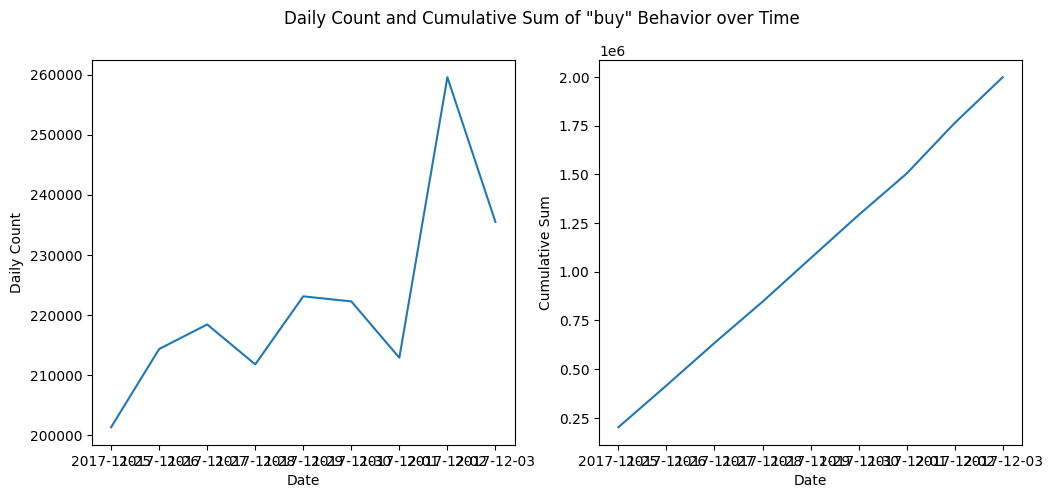

In [52]:
# Daily Count and Cumulative Sum of "buy" Behavior over Time
buy = df.filter(df.Behavior == 'buy')
buy_count = buy.groupby('Date').count()
buy_pd = buy_count.toPandas()
buy_pd['Date'] = pd.to_datetime(buy_pd['Date'])
buy_pd = buy_pd.sort_values('Date')
buy_pd['cumsum'] = buy_pd['count'].cumsum()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(buy_pd['Date'], buy_pd['count'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Count')
ax2.plot(buy_pd['Date'], buy_pd['cumsum'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Sum')
f.suptitle('Daily Count and Cumulative Sum of "buy" Behavior over Time')

In [54]:
buy_pd

User_ID,Product_ID,Category_ID,Behavior,Timestamp,Datetime,Month,Day,Day_of_Week,Hour,Date
1,2576651,149192,pv,1511572885,2017-11-25,2017-11,25,7,0,2017-11-25
1,3830808,4181361,pv,1511593493,2017-11-25,2017-11,25,7,0,2017-11-25
1,4365585,2520377,pv,1511596146,2017-11-25,2017-11,25,7,0,2017-11-25
1,4606018,2735466,pv,1511616481,2017-11-25,2017-11,25,7,0,2017-11-25
1,230380,411153,pv,1511644942,2017-11-25,2017-11,25,7,0,2017-11-25
1,3827899,2920476,pv,1511713473,2017-11-26,2017-11,26,1,0,2017-11-26
1,3745169,2891509,pv,1511725471,2017-11-26,2017-11,26,1,0,2017-11-26
1,1531036,2920476,pv,1511733732,2017-11-26,2017-11,26,1,0,2017-11-26
1,2266567,4145813,pv,1511741471,2017-11-27,2017-11,27,2,0,2017-11-27
1,2951368,1080785,pv,1511750828,2017-11-27,2017-11,27,2,0,2017-11-27


In [ ]:
df.dtypes

[('User_ID', 'string'),
 ('Product_ID', 'string'),
 ('Category_ID', 'string'),
 ('Behavior', 'string'),
 ('Timestamp', 'string'),
 ('Date', 'string'),
 ('Datetime', 'string'),
 ('Month', 'int'),
 ('Day', 'int'),
 ('Day_of_Week', 'int'),
 ('Hour', 'int')]

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [ ]:
# define a user defined funtion to calculate season of each behavior datatime
def season(month):
  if month >= 3 and month <= 5:
    return 'Spring'
  elif month >= 6 and month <= 8:
    return 'Summer'
  elif month >= 9 and month <= 11:
    return 'Autumn'
  else:
    return 'Winter'

get_season = udf(season, StringType())

In [ ]:
df = df.withColumn('Season', get_season(df['Month']))

In [ ]:
df.groupBy('Season').count().show()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.4.1-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.4.1-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
df.show(20)

+-------+----------+-----------+--------+----------+-------------------+-----+---+-----------+----+------+
|User_ID|Product_ID|Category_ID|Behavior| Timestamp|           Datetime|Month|Day|Day_of_Week|Hour|Season|
+-------+----------+-----------+--------+----------+-------------------+-----+---+-----------+----+------+
|      1|   2576651|     149192|      pv|1511572885|2017-11-25 01:21:25|   11| 25|          7|   1|Autumn|
|      1|   3830808|    4181361|      pv|1511593493|2017-11-25 07:04:53|   11| 25|          7|   7|Autumn|
|      1|   4365585|    2520377|      pv|1511596146|2017-11-25 07:49:06|   11| 25|          7|   7|Autumn|
|      1|   4606018|    2735466|      pv|1511616481|2017-11-25 13:28:01|   11| 25|          7|  13|Autumn|
|      1|    230380|     411153|      pv|1511644942|2017-11-25 21:22:22|   11| 25|          7|  21|Autumn|
|      1|   3827899|    2920476|      pv|1511713473|2017-11-26 16:24:33|   11| 26|          1|  16|Autumn|
|      1|   3745169|    2891509|     